In [2]:
from sklearn import kernel_ridge
import matplotlib.pyplot as plt
import numpy as np
from pbcpy.base import Cell
from pbcpy.grid import Grid
from pbcpy.grid_functions import Grid_Function_Base, Grid_Function, Grid_Function_Reciprocal, Grid_Space
from pbcpy.base import Coord
from pbcpy.system import System
from pbcpy.formats.qepp import PP
from pbcpy.formats.xsf import XSF
import matplotlib as mpl

In [3]:
number_of_columns = 100

In [4]:
data_dens = np.zeros((number_of_columns,125000))
data_vt = np.zeros((number_of_columns,125000))

for i in range(1,number_of_columns+1):
    #if i == 68:
    #    print('NOT CONVERGED')
    #else:
    print(i)
    density = PP('Densities2/Al_'+str(i)+'_0_fde_0rho.pp').read()
    kin_pot = PP('Potentials2/Al_'+str(i)+'_0_vt_rhotot_alph.pp').read()
    rho = density.plot
    v_t = kin_pot.plot
    
    grid_real_rho = Grid_Space(rho.grid.at,rho.grid.nr)
    grid_real_vt = Grid_Space(v_t.grid.at,v_t.grid.nr)

    mydens = Grid_Function(grid_real_rho,griddata_3d=rho.values)
    myvt = Grid_Function(grid_real_vt,griddata_3d=v_t.values)
    
    data_dens[i-1] = mydens.get_values_flatarray()
    data_vt[i-1] = myvt.get_values_flatarray()

1
(50, 50, 50) 125000
(50, 50, 50) 125000
2
(50, 50, 50) 125000
(50, 50, 50) 125000
3
(50, 50, 50) 125000
(50, 50, 50) 125000
4
(50, 50, 50) 125000
(50, 50, 50) 125000
5
(50, 50, 50) 125000
(50, 50, 50) 125000
6
(50, 50, 50) 125000
(50, 50, 50) 125000
7
(50, 50, 50) 125000
(50, 50, 50) 125000
8
(50, 50, 50) 125000
(50, 50, 50) 125000
9
(50, 50, 50) 125000
(50, 50, 50) 125000
10
(50, 50, 50) 125000
(50, 50, 50) 125000
11
(50, 50, 50) 125000
(50, 50, 50) 125000
12
(50, 50, 50) 125000
(50, 50, 50) 125000
13
(50, 50, 50) 125000
(50, 50, 50) 125000
14
(50, 50, 50) 125000
(50, 50, 50) 125000
15
(50, 50, 50) 125000
(50, 50, 50) 125000
16
(50, 50, 50) 125000
(50, 50, 50) 125000
17
(50, 50, 50) 125000
(50, 50, 50) 125000
18
(50, 50, 50) 125000
(50, 50, 50) 125000
19
(50, 50, 50) 125000
(50, 50, 50) 125000
20
(50, 50, 50) 125000
(50, 50, 50) 125000
21
(50, 50, 50) 125000
(50, 50, 50) 125000
22
(50, 50, 50) 125000
(50, 50, 50) 125000
23
(50, 50, 50) 125000
(50, 50, 50) 125000
24
(50, 50, 50) 1250

In [5]:
np.shape(data_dens), np.shape(data_vt)

((100, 125000), (100, 125000))

In [6]:
grid = 125000

In [7]:
X = np.zeros((number_of_columns,grid))
Y = np.zeros((number_of_columns,grid))

for i in range(number_of_columns):
    indx  = np.argsort(data_dens[i])
    indx2 = np.argsort(data_vt[i])
    X[i] = data_dens[i][indx[0:grid]]
    Y[i] = data_vt[i][indx[0:grid]]

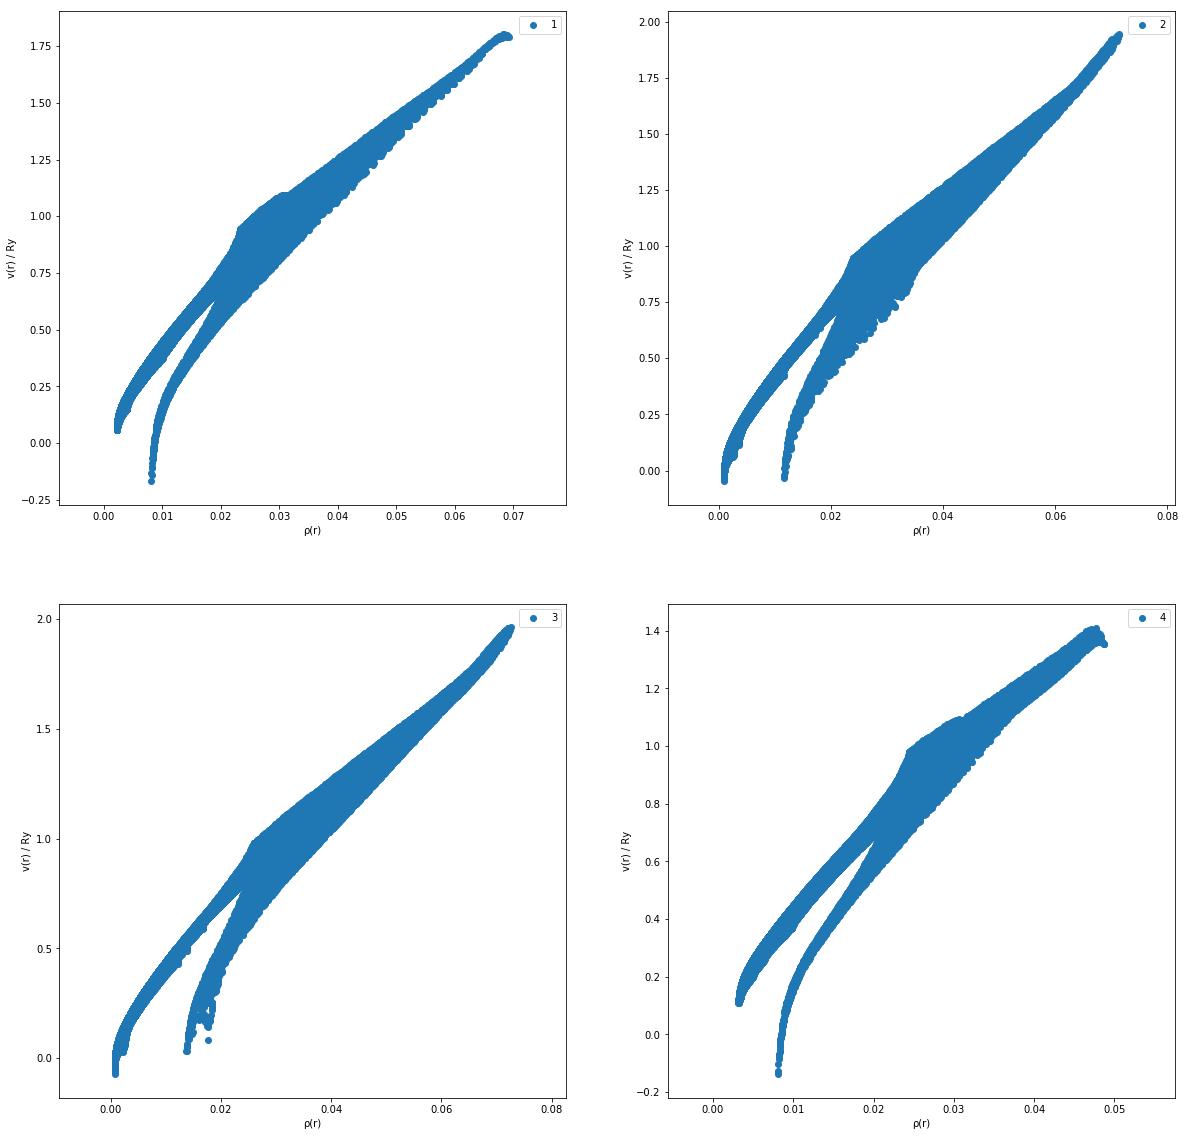

In [7]:
mpl.rcParams['figure.figsize'] = (20,20)
number_of_plots = 2
inner = 0
fig, axes = plt.subplots(nrows=number_of_plots,ncols=number_of_plots)
for i in range(number_of_plots):
    for j in range(number_of_plots):
        axes[i][j].scatter(X[inner],Y[inner], label = str(inner+1))
        axes[i][j].set_xlabel('ρ(r)')
        axes[i][j].set_ylabel('v(r) / Ry')
        axes[i][j].legend()
        inner += 1
plt.show()

Finding best parameters based on Kernel Ridge Regression:

In [104]:
X_train = X[0:90]
Y_train = Y[0:90]
X_test = X[90:100]
Y_test = Y[90:100]

In [108]:
kernels = ['linear','polynomial','laplacian','chi2','sigmoid','rbf']
alpha = [0.0,0.01,0.1,0.3,0.4,0.5,0.6,0.7,0.9,1.0]
gamma = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

In [109]:
score_array = np.zeros((len(kernels),len(gamma),len(alpha)))
inner = 0
inner2 = 0
inner3 = 0
for j in kernels:
    inner2 = 0
    for i in gamma:
        inner3 = 0
        for h in alpha:
            model = kernel_ridge.KernelRidge(kernel = j, alpha = h, gamma=i)
            model.fit(X_train, Y_train)
            score = model.score(X_test,Y_test)
            print('Kernel: ',j,'gamma: ',i, 'alpha:', h, 'score: ',score)
            score_array[inner][inner2][inner3] = score
            inner3 +=1
        inner2 += 1
    inner += 1

Kernel:  linear gamma:  0.0 alpha: 0.0 score:  -0.110349091395
Kernel:  linear gamma:  0.0 alpha: 0.01 score:  0.415117692953
Kernel:  linear gamma:  0.0 alpha: 0.1 score:  0.428398056455
Kernel:  linear gamma:  0.0 alpha: 0.3 score:  0.430456182145
Kernel:  linear gamma:  0.0 alpha: 0.4 score:  0.430449540499
Kernel:  linear gamma:  0.0 alpha: 0.5 score:  0.430271402226
Kernel:  linear gamma:  0.0 alpha: 0.6 score:  0.429996669504
Kernel:  linear gamma:  0.0 alpha: 0.7 score:  0.429660550391
Kernel:  linear gamma:  0.0 alpha: 0.9 score:  0.428875969321
Kernel:  linear gamma:  0.0 alpha: 1.0 score:  0.42844830478
Kernel:  linear gamma:  0.1 alpha: 0.0 score:  -0.110349091395
Kernel:  linear gamma:  0.1 alpha: 0.01 score:  0.415117692953
Kernel:  linear gamma:  0.1 alpha: 0.1 score:  0.428398056455
Kernel:  linear gamma:  0.1 alpha: 0.3 score:  0.430456182145
Kernel:  linear gamma:  0.1 alpha: 0.4 score:  0.430449540499
Kernel:  linear gamma:  0.1 alpha: 0.5 score:  0.430271402226
Kerne

/home/johannes/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Kernel:  polynomial gamma:  0.0 alpha: 0.0 score:  -1.20574325515
Kernel:  polynomial gamma:  0.0 alpha: 0.01 score:  -0.143393714826
Kernel:  polynomial gamma:  0.0 alpha: 0.1 score:  -0.142279104351
Kernel:  polynomial gamma:  0.0 alpha: 0.3 score:  -0.140657652825
Kernel:  polynomial gamma:  0.0 alpha: 0.4 score:  -0.14028560869
Kernel:  polynomial gamma:  0.0 alpha: 0.5 score:  -0.14020344309
Kernel:  polynomial gamma:  0.0 alpha: 0.6 score:  -0.140409240078
Kernel:  polynomial gamma:  0.0 alpha: 0.7 score:  -0.140901096368
Kernel:  polynomial gamma:  0.0 alpha: 0.9 score:  -0.142735436467
Kernel:  polynomial gamma:  0.0 alpha: 1.0 score:  -0.144074176181
Kernel:  polynomial gamma:  0.1 alpha: 0.0 score:  -0.202263551637
Kernel:  polynomial gamma:  0.1 alpha: 0.01 score:  0.384277399769
Kernel:  polynomial gamma:  0.1 alpha: 0.1 score:  0.414375211821
Kernel:  polynomial gamma:  0.1 alpha: 0.3 score:  0.422634141418
Kernel:  polynomial gamma:  0.1 alpha: 0.4 score:  0.424402204648


Kernel:  laplacian gamma:  0.1 alpha: 0.4 score:  -45.5301018792
Kernel:  laplacian gamma:  0.1 alpha: 0.5 score:  -48.1264601284
Kernel:  laplacian gamma:  0.1 alpha: 0.6 score:  -50.5588488001
Kernel:  laplacian gamma:  0.1 alpha: 0.7 score:  -52.8398178745
Kernel:  laplacian gamma:  0.1 alpha: 0.9 score:  -56.9942083939
Kernel:  laplacian gamma:  0.1 alpha: 1.0 score:  -58.8888904319
Kernel:  laplacian gamma:  0.2 alpha: 0.0 score:  -84.0562001663
Kernel:  laplacian gamma:  0.2 alpha: 0.01 score:  -84.3125082169
Kernel:  laplacian gamma:  0.2 alpha: 0.1 score:  -86.4596172853
Kernel:  laplacian gamma:  0.2 alpha: 0.3 score:  -90.3864076994
Kernel:  laplacian gamma:  0.2 alpha: 0.4 score:  -92.0096071503
Kernel:  laplacian gamma:  0.2 alpha: 0.5 score:  -93.4550056484
Kernel:  laplacian gamma:  0.2 alpha: 0.6 score:  -94.7500578947
Kernel:  laplacian gamma:  0.2 alpha: 0.7 score:  -95.9168978573
Kernel:  laplacian gamma:  0.2 alpha: 0.9 score:  -97.9348462845
Kernel:  laplacian gamma

Kernel:  chi2 gamma:  0.3 alpha: 0.3 score:  -0.628108964857
Kernel:  chi2 gamma:  0.3 alpha: 0.4 score:  -0.930793907723
Kernel:  chi2 gamma:  0.3 alpha: 0.5 score:  -1.26463232695
Kernel:  chi2 gamma:  0.3 alpha: 0.6 score:  -1.62472622358
Kernel:  chi2 gamma:  0.3 alpha: 0.7 score:  -2.00759462216
Kernel:  chi2 gamma:  0.3 alpha: 0.9 score:  -2.83091066611
Kernel:  chi2 gamma:  0.3 alpha: 1.0 score:  -3.26695451609
Kernel:  chi2 gamma:  0.4 alpha: 0.0 score:  -1.28990866822
Kernel:  chi2 gamma:  0.4 alpha: 0.01 score:  -0.488912659644
Kernel:  chi2 gamma:  0.4 alpha: 0.1 score:  -0.177298305878
Kernel:  chi2 gamma:  0.4 alpha: 0.3 score:  -0.628108964857
Kernel:  chi2 gamma:  0.4 alpha: 0.4 score:  -0.930793907723
Kernel:  chi2 gamma:  0.4 alpha: 0.5 score:  -1.26463232695
Kernel:  chi2 gamma:  0.4 alpha: 0.6 score:  -1.62472622358
Kernel:  chi2 gamma:  0.4 alpha: 0.7 score:  -2.00759462216
Kernel:  chi2 gamma:  0.4 alpha: 0.9 score:  -2.83091066611
Kernel:  chi2 gamma:  0.4 alpha: 

/home/johannes/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.0850454854365354e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)


Kernel:  sigmoid gamma:  0.2 alpha: 0.0 score:  -120.83483606
Kernel:  sigmoid gamma:  0.2 alpha: 0.01 score:  -0.144798076131
Kernel:  sigmoid gamma:  0.2 alpha: 0.1 score:  -0.142418574188
Kernel:  sigmoid gamma:  0.2 alpha: 0.3 score:  -0.140703642311
Kernel:  sigmoid gamma:  0.2 alpha: 0.4 score:  -0.140319919359
Kernel:  sigmoid gamma:  0.2 alpha: 0.5 score:  -0.140230749077
Kernel:  sigmoid gamma:  0.2 alpha: 0.6 score:  -0.140431878445
Kernel:  sigmoid gamma:  0.2 alpha: 0.7 score:  -0.140920402618
Kernel:  sigmoid gamma:  0.2 alpha: 0.9 score:  -0.142750304489
Kernel:  sigmoid gamma:  0.2 alpha: 1.0 score:  -0.144087492974


/home/johannes/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 8.437023940910923e-20
  ' condition number: {}'.format(rcond), RuntimeWarning)


Kernel:  sigmoid gamma:  0.3 alpha: 0.0 score:  -201466.596323
Kernel:  sigmoid gamma:  0.3 alpha: 0.01 score:  -0.143398086058
Kernel:  sigmoid gamma:  0.3 alpha: 0.1 score:  -0.142279540153
Kernel:  sigmoid gamma:  0.3 alpha: 0.3 score:  -0.140657797112
Kernel:  sigmoid gamma:  0.3 alpha: 0.4 score:  -0.140285716538
Kernel:  sigmoid gamma:  0.3 alpha: 0.5 score:  -0.140203529073
Kernel:  sigmoid gamma:  0.3 alpha: 0.6 score:  -0.140409311484
Kernel:  sigmoid gamma:  0.3 alpha: 0.7 score:  -0.140901157363
Kernel:  sigmoid gamma:  0.3 alpha: 0.9 score:  -0.142735483581
Kernel:  sigmoid gamma:  0.3 alpha: 1.0 score:  -0.144074218436


/home/johannes/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.771486010012314e-20
  ' condition number: {}'.format(rcond), RuntimeWarning)


Kernel:  sigmoid gamma:  0.4 alpha: 0.0 score:  -409729.538636
Kernel:  sigmoid gamma:  0.4 alpha: 0.01 score:  -0.143393726835
Kernel:  sigmoid gamma:  0.4 alpha: 0.1 score:  -0.14227910555
Kernel:  sigmoid gamma:  0.4 alpha: 0.3 score:  -0.140657653222
Kernel:  sigmoid gamma:  0.4 alpha: 0.4 score:  -0.140285608988
Kernel:  sigmoid gamma:  0.4 alpha: 0.5 score:  -0.140203443328
Kernel:  sigmoid gamma:  0.4 alpha: 0.6 score:  -0.140409240275
Kernel:  sigmoid gamma:  0.4 alpha: 0.7 score:  -0.140901096537
Kernel:  sigmoid gamma:  0.4 alpha: 0.9 score:  -0.142735436598
Kernel:  sigmoid gamma:  0.4 alpha: 1.0 score:  -0.144074176298
Kernel:  sigmoid gamma:  0.5 alpha: 0.0 score:  0.155037261381
Kernel:  sigmoid gamma:  0.5 alpha: 0.01 score:  -0.143393714859
Kernel:  sigmoid gamma:  0.5 alpha: 0.1 score:  -0.142279104354
Kernel:  sigmoid gamma:  0.5 alpha: 0.3 score:  -0.140657652826
Kernel:  sigmoid gamma:  0.5 alpha: 0.4 score:  -0.140285608691
Kernel:  sigmoid gamma:  0.5 alpha: 0.5 s

Kernel:  rbf gamma:  0.6 alpha: 0.3 score:  0.414988736814
Kernel:  rbf gamma:  0.6 alpha: 0.4 score:  0.417065359171
Kernel:  rbf gamma:  0.6 alpha: 0.5 score:  0.418079565989
Kernel:  rbf gamma:  0.6 alpha: 0.6 score:  0.418084960821
Kernel:  rbf gamma:  0.6 alpha: 0.7 score:  0.417083390669
Kernel:  rbf gamma:  0.6 alpha: 0.9 score:  0.412032450428
Kernel:  rbf gamma:  0.6 alpha: 1.0 score:  0.40798143802
Kernel:  rbf gamma:  0.7 alpha: 0.0 score:  -0.442848675512
Kernel:  rbf gamma:  0.7 alpha: 0.01 score:  0.367390289361
Kernel:  rbf gamma:  0.7 alpha: 0.1 score:  0.4010920144
Kernel:  rbf gamma:  0.7 alpha: 0.3 score:  0.412210932112
Kernel:  rbf gamma:  0.7 alpha: 0.4 score:  0.41496761732
Kernel:  rbf gamma:  0.7 alpha: 0.5 score:  0.416467008784
Kernel:  rbf gamma:  0.7 alpha: 0.6 score:  0.416805336577
Kernel:  rbf gamma:  0.7 alpha: 0.7 score:  0.416024647494
Kernel:  rbf gamma:  0.7 alpha: 0.9 score:  0.411183073113
Kernel:  rbf gamma:  0.7 alpha: 1.0 score:  0.407148229884

In [125]:
kernels = ['chi2','sigmoid','rbf']
alpha = [0.0,0.01,0.1,0.3,0.4,0.5,0.6,0.7,0.9,1.0]
gamma = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

In [126]:
score_array_2 = np.zeros((len(kernels),len(gamma),len(alpha)))
inner = 0
inner2 = 0
inner3 = 0
for j in kernels:
    inner2 = 0
    for i in gamma:
        inner3 = 0
        for h in alpha:
            model = kernel_ridge.KernelRidge(kernel = j, alpha = h, gamma=i)
            model.fit(X_train, Y_train)
            predict = model.predict(X_test)
            score = 0.1*np.sum(np.abs((predict[:]-Y_test[:])/Y_test[:]))
            print('Kernel: ',j,'gamma: ',i, 'alpha:', h, 'score: ',score)
            score_array_2[inner][inner2][inner3] = score
            inner3 +=1
        inner2 += 1
    inner += 1

Kernel:  chi2 gamma:  0.0 alpha: 0.0 score:  17625.09237
Kernel:  chi2 gamma:  0.0 alpha: 0.01 score:  15502.459077
Kernel:  chi2 gamma:  0.0 alpha: 0.1 score:  14399.275789
Kernel:  chi2 gamma:  0.0 alpha: 0.3 score:  16154.8162512
Kernel:  chi2 gamma:  0.0 alpha: 0.4 score:  17204.7179675
Kernel:  chi2 gamma:  0.0 alpha: 0.5 score:  18292.3235635
Kernel:  chi2 gamma:  0.0 alpha: 0.6 score:  19407.1984205
Kernel:  chi2 gamma:  0.0 alpha: 0.7 score:  20540.1917578
Kernel:  chi2 gamma:  0.0 alpha: 0.9 score:  22834.2223463
Kernel:  chi2 gamma:  0.0 alpha: 1.0 score:  23985.6121243
Kernel:  chi2 gamma:  0.1 alpha: 0.0 score:  17625.09237
Kernel:  chi2 gamma:  0.1 alpha: 0.01 score:  15502.459077
Kernel:  chi2 gamma:  0.1 alpha: 0.1 score:  14399.275789


KeyboardInterrupt: 

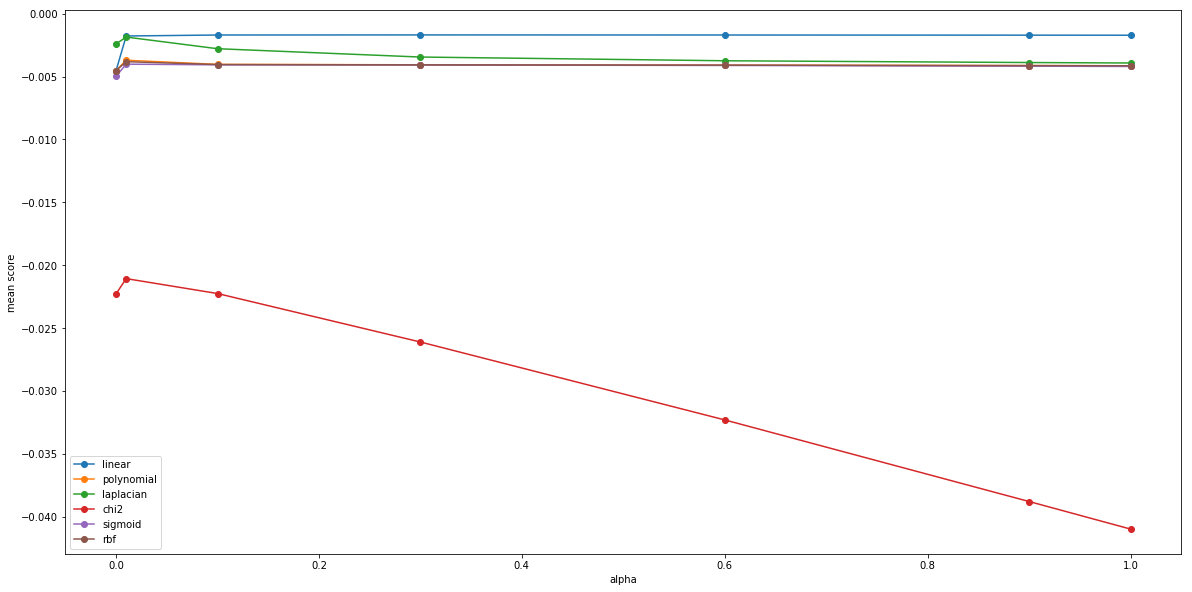

In [67]:
mpl.rcParams['figure.figsize'] = (30,30)
fig, axes = plt.subplit()
inner = 0
for i in kernels[]:
    plt.plot(alpha, mean[inner], label = i, marker = 'o')
    inner +=1
    
plt.xlabel('alpha')
plt.ylabel('mean score')
plt.legend()
plt.show()

testing alpha in range 0 - 0.1